In [36]:
import pandas as pd
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from data_formats import read_data, ExperimentData

In [37]:
TRANSFORM = "williams_and_linear_interpolation"
PYTHON_DIR = "migration/python"
R_DIR = "migration/r"

In [38]:
names = []

clean_path = lambda x: os.path.basename(x).split(".")[0]

for name in glob("data/*.xlsx"):

    data = read_data(name)
    
    for i in data.additional_stress.keys():
        
        names.append(f"{clean_path(name)}_{i}_{TRANSFORM}_lmcurve.csv")
        
        

In [39]:
python_inter = set(names).intersection(os.listdir(PYTHON_DIR))
r_inter = set(names).intersection(os.listdir(R_DIR))

combined = python_inter.intersection(r_inter)
len(python_inter), len(r_inter), len(combined)

(42, 0, 0)

In [18]:
files = []
for name in glob("data/*.xlsx"):

    data = read_data(name)
    
    for i in data.additional_stress.keys():
        
        p = f"{clean_path(name)}_{i}_{TRANSFORM}_lmcurve.csv"
        if p in combined:
            files.append((data, i, p))
        

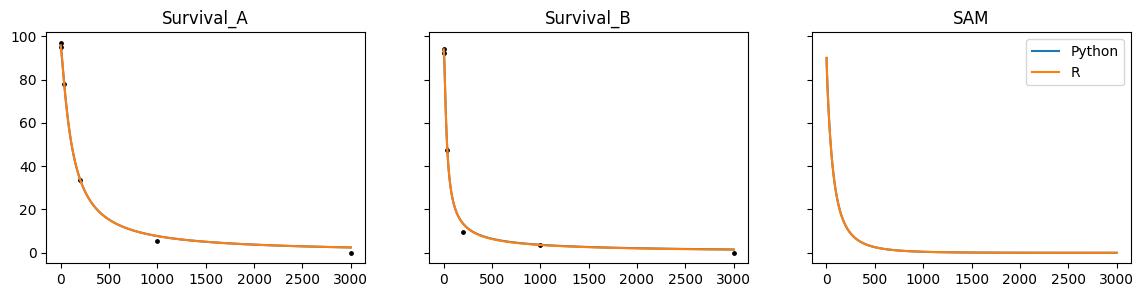

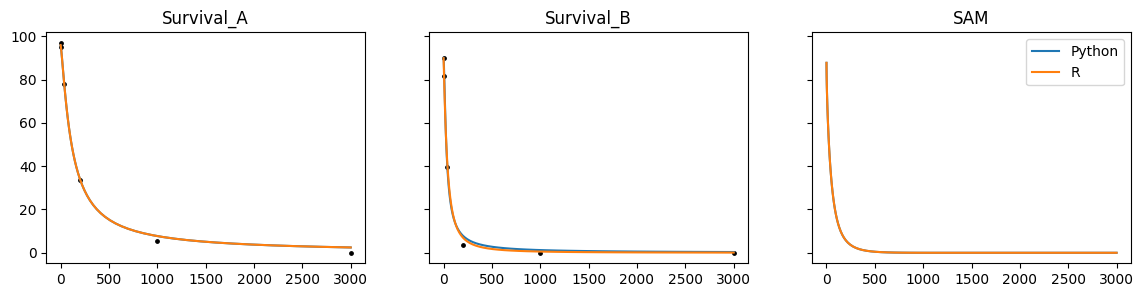

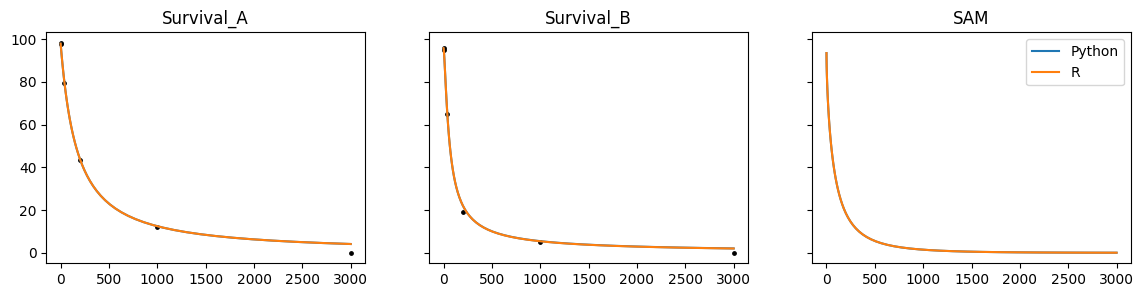

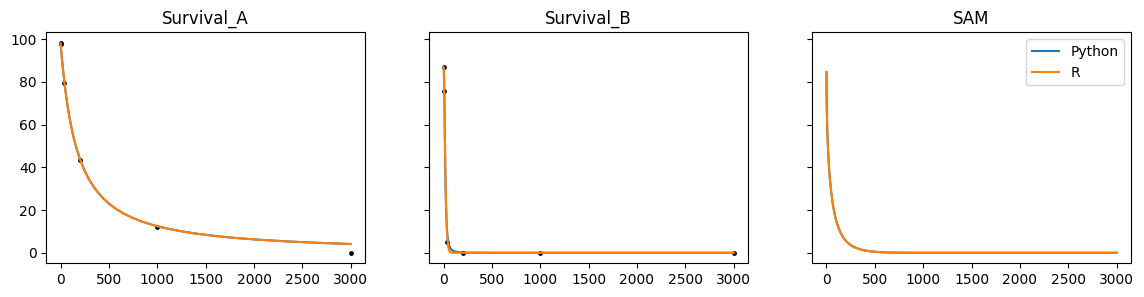

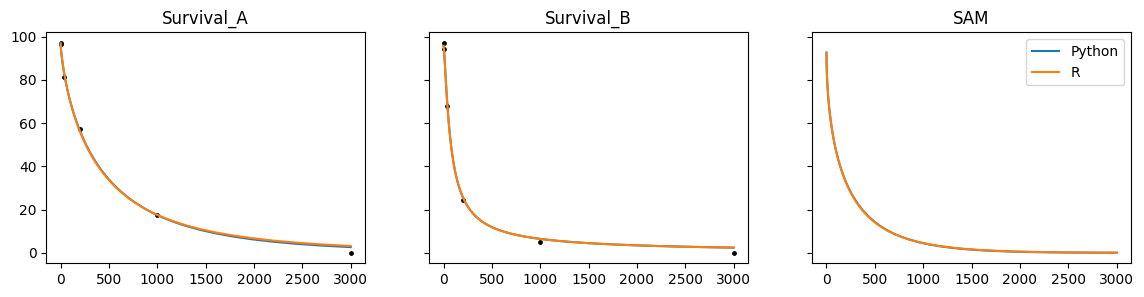

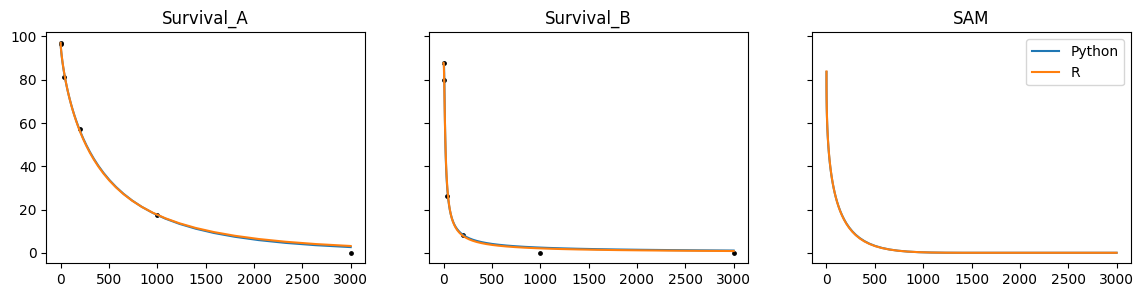

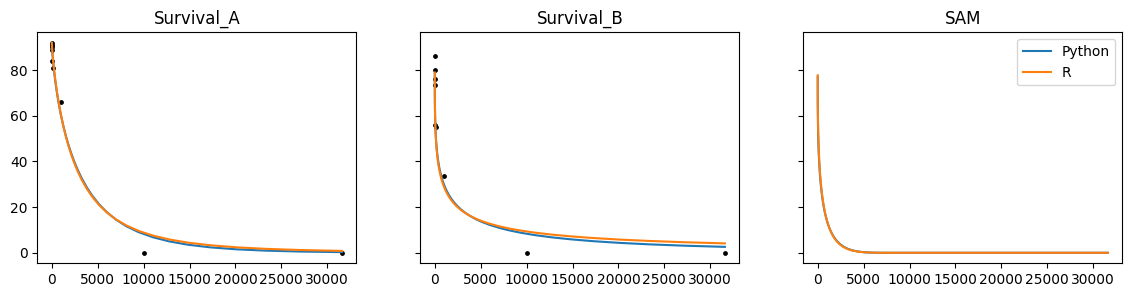

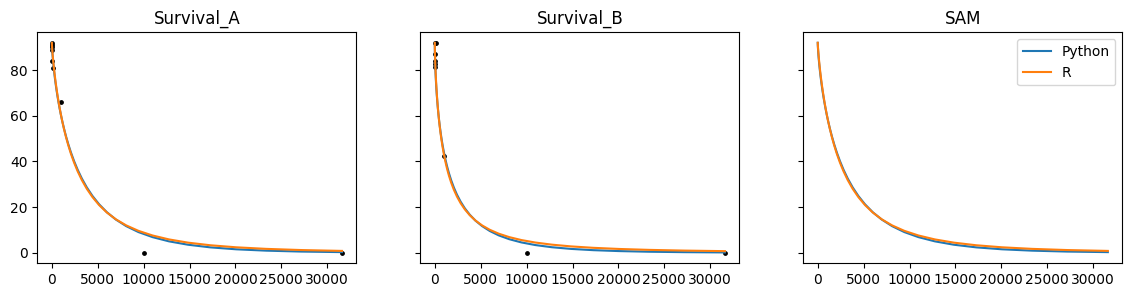

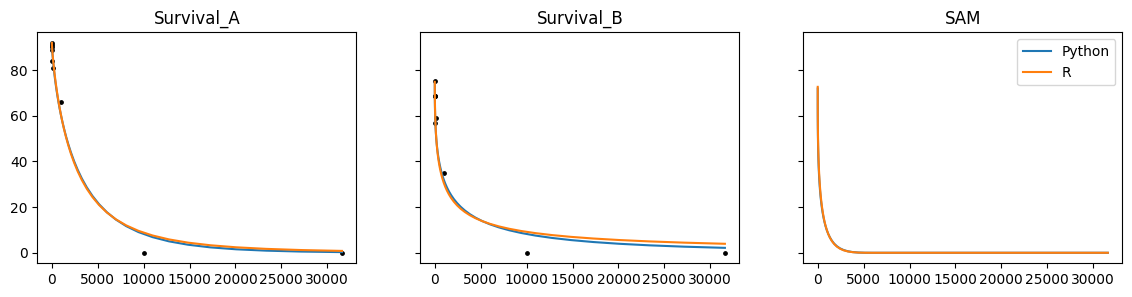

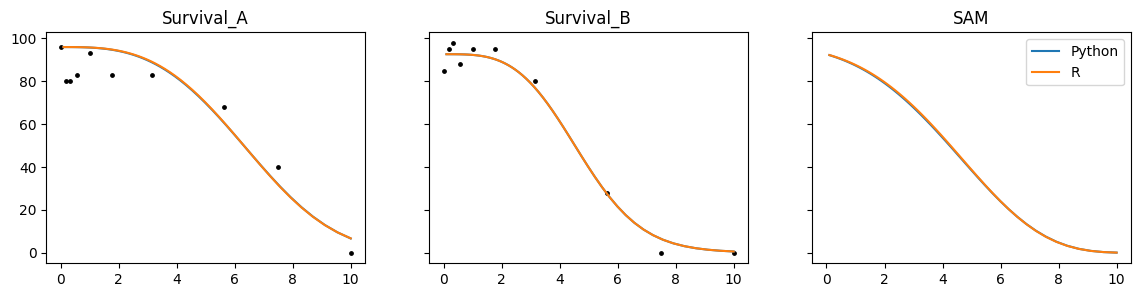

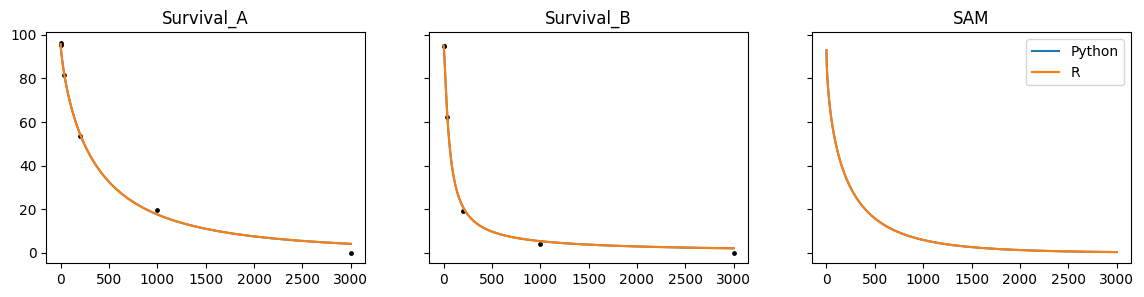

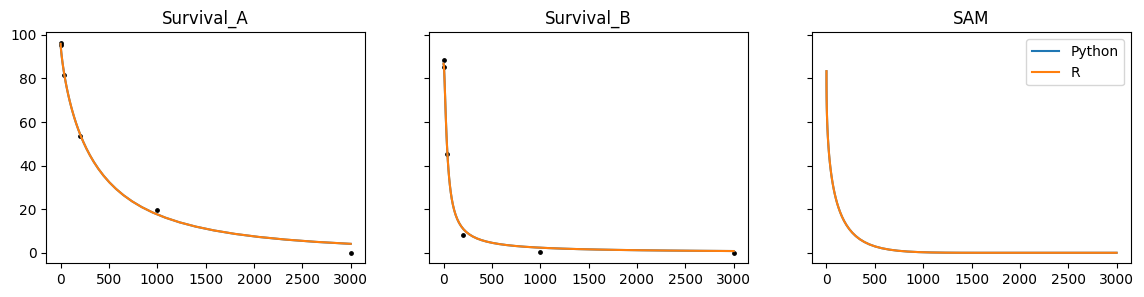

In [23]:
for data,stress, path in files:

    data: ExperimentData
    py = pd.read_csv(f"{PYTHON_DIR}/{path}")
    r = pd.read_csv(f"{R_DIR}/{path}")

    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(14, 3))

    ax[0].scatter(data.main_series.concentration, data.main_series.survival_rate, c = "black", s= 6)
    ax[0].plot(py['Concentration'], py['Survival_A'], label='Python', )
    ax[0].plot(r['Concentration'], r['Survival_A'], label='R', )
    ax[0].set_title("Survival_A")
    # same for b
    
    series = data.additional_stress[stress]
    ax[1].scatter(series.concentration, series.survival_rate, c = "black", s= 6)
    ax[1].plot(py['Concentration'], py['Survival_B'], label='Python', )
    ax[1].plot(r['Concentration'], r['Survival_B'], label='R', )
    ax[1].set_title("Survival_B")

    # same for c
    ax[2].plot(py['Concentration'], py['SAM'], label='Python', )
    ax[2].plot(r['Concentration'], r['SAM'], label='R', )
    ax[2].set_title("SAM")

    plt.legend()
    plt.show()
    
    